In [28]:
import os
import json
from pathlib import Path

root_data_path = Path(
    "/home/ohad/work/quantum_variational_combinatorial_optimization/qemc/",
    "EXP_DATA",
    "ref_29_table3_comparison",
)

graph_names = sorted(os.listdir(root_data_path))
best_avg_cuts = []

for graph_name in graph_names:
    data_path = Path(
        root_data_path,
        graph_name,
        "backend_statevector_simulator"
    )
    
    with open(Path(data_path, "total_backend_configurations_metadata.json"), "r") as f:
        data = json.load(f)
        
    
    best_average_best_cut = data["best_average_best_cut"]
    best_configuration_id = data["best_configuration"]
    best_configuration_data = data["configurations"][str(best_configuration_id)]
    best_avg_cuts.append(best_average_best_cut)
    
    print(f"For graph {graph_name}, the following configuration yielded the best average best cut:")
    print(f"best_configuration_id = {best_configuration_id}")
    print(f"best_average_best_cut = {best_average_best_cut: .2f}")
    print(f"num_layers = {best_configuration_data['setting']['num_layers']}")
    print(f"rhobeg = {best_configuration_data['setting']['optimization_options']['rhobeg']}")
    print()

For graph graph_random_graph__p_0.300__density_0.30__seed_0, the following configuration yielded the best average best cut:
best_configuration_id = 7
best_average_best_cut =  1335.00
num_layers = 7
rhobeg = 0.9

For graph graph_random_graph__p_0.400__density_0.40__seed_0, the following configuration yielded the best average best cut:
best_configuration_id = 7
best_average_best_cut =  1752.20
num_layers = 7
rhobeg = 0.9

For graph graph_random_graph__p_0.500__density_0.49__seed_0, the following configuration yielded the best average best cut:
best_configuration_id = 7
best_average_best_cut =  2153.90
num_layers = 7
rhobeg = 0.9

For graph graph_random_graph__p_0.600__density_0.60__seed_0, the following configuration yielded the best average best cut:
best_configuration_id = 3
best_average_best_cut =  2560.70
num_layers = 5
rhobeg = 1



In [35]:
2560.7 / 2546

1.0057737627651218

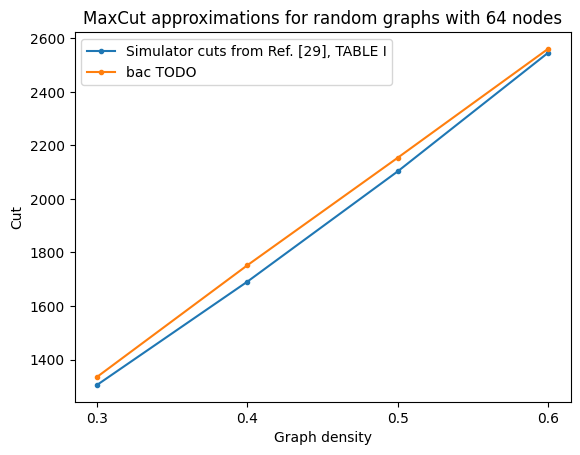

In [29]:
import matplotlib.pyplot as plt

densities = [0.3, 0.4, 0.5, 0.6]
# ilp_cuts = [383, 443, 497, 553]
ref29_quantum_simulator_cuts = [1305, 1691, 2103, 2546]

plt.plot(densities, ref29_quantum_simulator_cuts, label="Simulator cuts from Ref. [29], TABLE I", marker=".")
# plt.plot(densities, ilp_cuts, label="ILP cuts from Ref. [29], TABLE I", marker=".")
plt.plot(densities, best_avg_cuts, label="bac TODO", marker=".")

plt.xticks(ticks=densities, labels=densities)

plt.xlabel("Graph density")
plt.ylabel("Cut")
plt.title("MaxCut approximations for random graphs with 64 nodes")

plt.legend()
plt.savefig("ref29_table1_comparison_fig.png")
plt.show()

In [30]:
1335/1305

1.0229885057471264